In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
shap_filename = '/home/yoshisada/Desktop/condensa/notebooks/condensa_outputs/shap_vals.csv'
prune_filename = '/home/yoshisada/Desktop/condensa/notebooks/condensa_outputs/master_pruning_data.csv'

In [4]:
OUT_PATH = '/home/yoshisada/Desktop/condensa/notebooks/shap_graphs'

In [5]:
now = datetime.now()
# mm_dd_YY_H:M:S
dt_string = now.strftime("%m-%d-%Y_%H:%M:%S")
print("date and time =", dt_string)

date and time = 03-17-2023_14:22:16


In [6]:
# shap_df
shap_df = pd.read_csv(shap_filename)

# prune_df
prune_df = pd.read_csv(prune_filename)

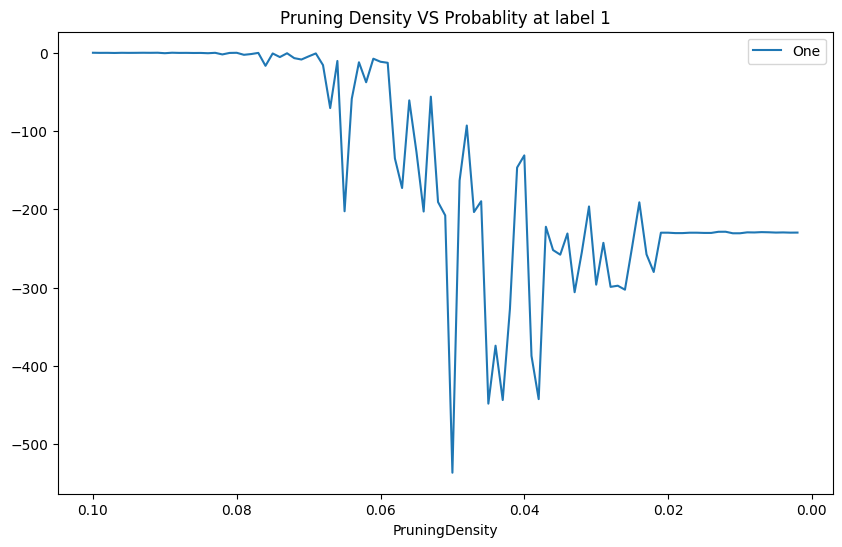

In [7]:
shap_df.plot(x='PruningDensity', title='Pruning Density VS Probablity at label 1', y=['One'], figsize=(10,6))
plt.gca().invert_xaxis()
plt.savefig(f'{OUT_PATH}/num_one/den_v_prob{dt_string}.png')

In [8]:
# normalizes values to between 0 and 1
def normalize_col(df, col_label):
    # copy the data
    df_min_max_scaled = df.copy()
    
    # apply normalization techniques to label
    df_min_max_scaled[col_label] = (df_min_max_scaled[col_label] - df_min_max_scaled[col_label].min()) / (df_min_max_scaled[col_label].max() - df_min_max_scaled[col_label].min())    
    
    # return new df
    return df_min_max_scaled

Remeber that the labels need to be changed according to what column value I need to have normalized

In [9]:
n_shap_df = normalize_col(shap_df, 'One')
n_prune_df = normalize_col(prune_df, 'Accuracy')

In [10]:
# add the accuracy column to n_shap_df 
n_shap_df['Accuracy'] = n_prune_df['Accuracy']

graph of normalized num value and accuracy of the model

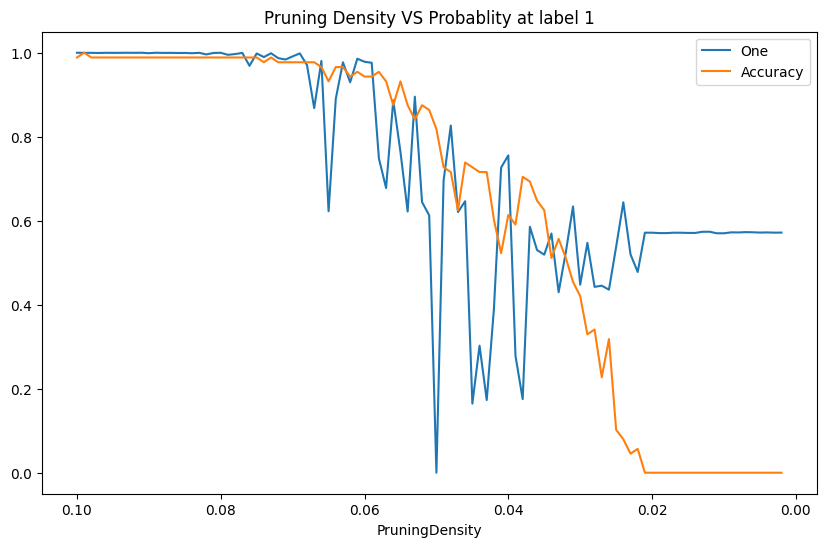

In [11]:
n_shap_df.plot(x='PruningDensity', title='Pruning Density VS Probablity at label 1', y=['One', 'Accuracy'], figsize=(10,6))
plt.gca().invert_xaxis()
plt.savefig(f'{OUT_PATH}/num_one/den_v_acc_and_prob{dt_string}.png')

Lets make a bell curve

<Axes: title={'center': 'Distribution of Num 1 Probabilty'}, ylabel='Frequency'>

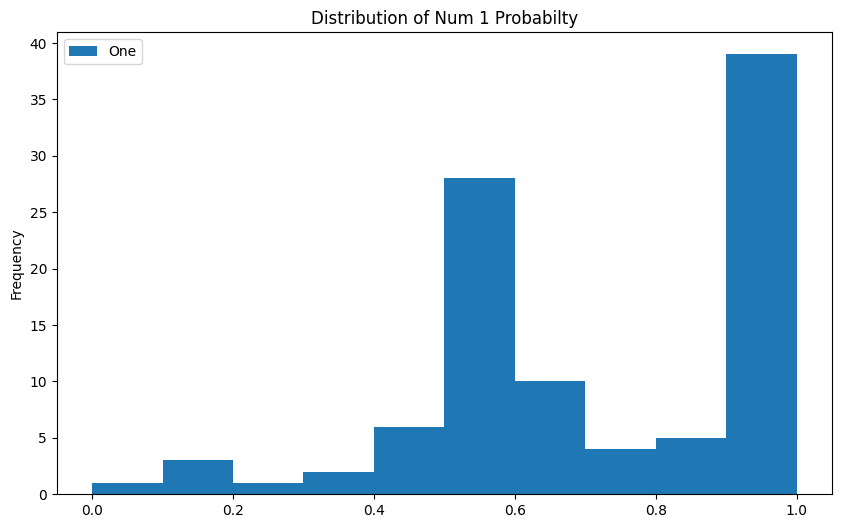

In [20]:
n_shap_df.plot.hist(title='Distribution of Num 1 Probabilty', y=['One'], figsize=(10,6))

<Axes: title={'center': 'Pruning Density VS Probablity at label 1'}, ylabel='Frequency'>

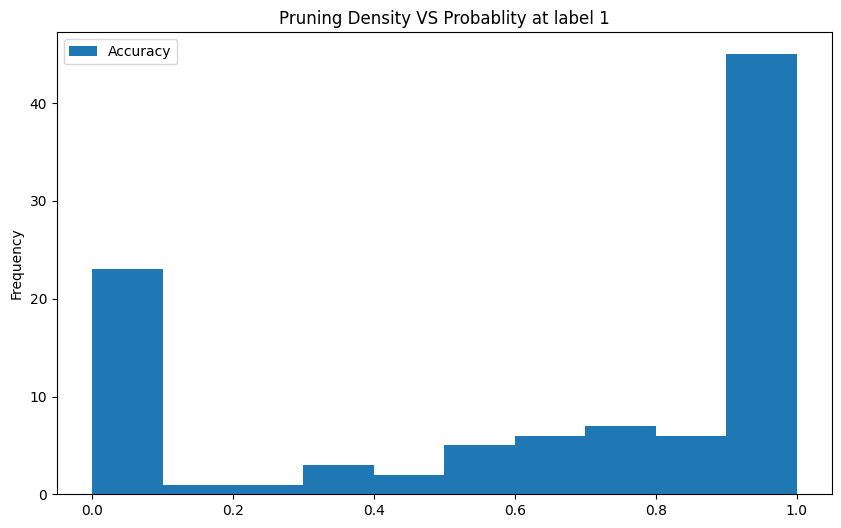

In [17]:
n_shap_df.plot.hist(title='Distribution of Accuracy', y=['Accuracy'], figsize=(10,6))

<Axes: title={'center': 'Distribution of Accuracy and Probability of Picking Num 1 Correctly'}, ylabel='Frequency'>

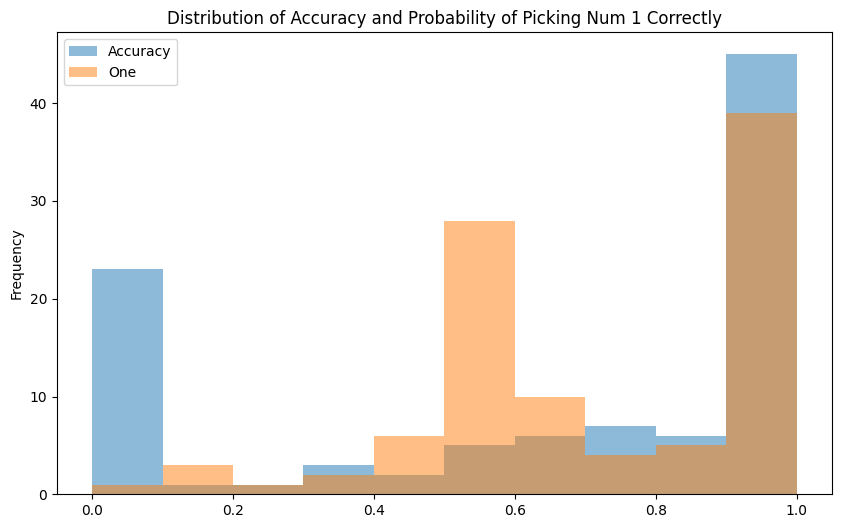

In [19]:
n_shap_df.plot.hist(title='Distribution of Accuracy and Probability of Picking Num 1 Correctly', y=['Accuracy', 'One'], figsize=(10,6), alpha=0.5)

In [24]:
n_shap_df['One'].describe()

count    99.000000
mean      0.731373
std       0.249993
min       0.000000
25%       0.570949
50%       0.677932
75%       0.996382
max       1.000000
Name: One, dtype: float64

In [25]:
n_shap_df['Accuracy'].describe()

count    99.000000
mean      0.636823
std       0.398465
min       0.000000
25%       0.272727
50%       0.840909
75%       0.988636
max       1.000000
Name: Accuracy, dtype: float64